### Advertising

In [26]:
## import important library
import pandas as pd
import numpy as np

In [27]:
## Load dataset in csv format
df=pd.read_csv('Advertising.csv')

The head() function is used to get the first n rows.

This function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it.

In [28]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [29]:
### drop the variable
df=df.drop(['Unnamed: 0'], axis=1)

The dtypes property is used to find the dtypes in the DataFrame.

This returns a Series with the data type of each column. The result’s index is the original DataFrame’s columns. Columns with mixed types are stored with the object dtype.

In [30]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [31]:
## Check null value
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [32]:
## Check no of rows and columns
df.shape

(200, 4)

In [33]:
### numerical variable preprocessing
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


#### Import seaborn library
**Seaborn** *is an open-source Python library built on top of matplotlib. It is used for data visualization and exploratory data analysis. Seaborn works easily with dataframes and the Pandas library. The graphs created can also be customized easily*

In [34]:
import seaborn as sns

A **histogram** is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within disrete bins.

A **kernel density estimate (KDE)** plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

<AxesSubplot:xlabel='TV', ylabel='Count'>

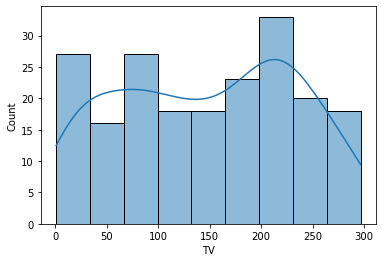

In [35]:
sns.histplot(df['TV'],kde=True)

<AxesSubplot:xlabel='newspaper', ylabel='Count'>

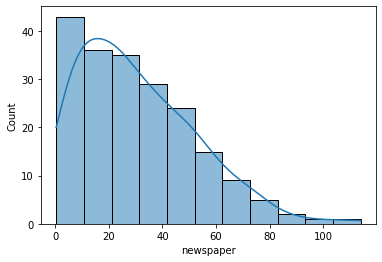

In [36]:
sns.histplot(df['newspaper'],kde=True)

The **math.log1p()** method returns log(1+number), computed in a way that is accurate even when the value of number is close to zero.

In [37]:
### How to transform skewed variable

df['newspaper']=np.log1p(df['newspaper'])

<AxesSubplot:xlabel='newspaper', ylabel='Count'>

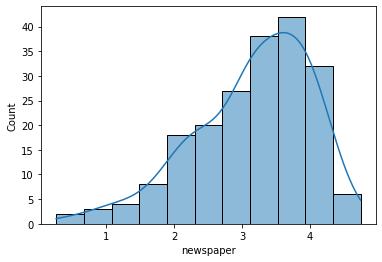

In [38]:
sns.histplot(df['newspaper'],kde=True)

In [59]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,3.153164,14.022500
std,85.854236,14.846809,0.866508,5.217457
min,0.700000,0.000000,0.262364,1.600000
25%,74.375000,9.975000,2.621019,10.375000
50%,149.750000,22.900000,3.286519,12.900000
75%,218.825000,36.525000,3.830813,17.400000
max,296.400000,49.600000,4.744932,27.000000


C:\Users\birba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='newspaper'>

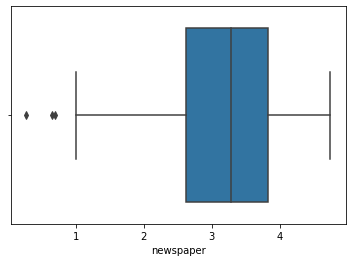

In [60]:
sns.boxplot(df['newspaper'])

**Scikit-learn (Sklearn)** is the most useful and robust library for machine learning in Python. 
It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python. 
This library, which is largely written in Python, is built upon NumPy, SciPy and Matplotlib.

The **sklearn.preprocessing** package provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators.

**MinMaxScaler** scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset. This scaling compresses all the inliers in the narrow range [0, 0.005]. 



In [62]:
### Scalling
from sklearn.preprocessing import MinMaxScaler

mn=MinMaxScaler()
df_num=mn.fit_transform(df[['TV','newspaper','radio']])

In [63]:
df_num_df=pd.DataFrame(df_num,index=df.index,columns=['TV','newspaper','radio'])

In [64]:
df_num_df

,TV,newspaper,radio
0,0.775786,0.889888,0.762097
1,0.148123,0.796072,0.792339
2,0.055800,0.890206,0.925403
3,0.509976,0.852996,0.832661
4,0.609063,0.852621,0.217742
...,...,...,...
195,0.126818,0.542605,0.074597
196,0.316199,0.434106,0.098790
197,0.596212,0.387973,0.187500
198,0.956713,0.880145,0.846774


In [65]:
df_num_df.describe()

,TV,newspaper,radio
count,200.000000,200.000000,200.000000
mean,0.494902,0.644898,0.469032
std,0.290342,0.193306,0.299331
min,0.000000,0.000000,0.000000
25%,0.249155,0.526184,0.201109
50%,0.504058,0.674648,0.461694
75%,0.737656,0.796072,0.736391
max,1.000000,1.000000,1.000000


In [66]:
X=df[['TV','newspaper','radio']]
y=df['sales']

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test=train_test_split(X,y ,test_size =0.2, random_state=20)

In [69]:
from sklearn.linear_model import LinearRegression

In [49]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [50]:
pred=lr.predict(X_test)

In [51]:
pred

array([18.2564881 , 19.27481229,  8.79968219, 15.85082142, 19.3822815 ,
       17.24132894, 12.21893374,  8.15804024, 21.56491661,  5.51136538,
       11.54819127, 13.81437613, 16.99975357, 11.03317638, 20.74489437,
       24.68026387,  5.39920762, 13.28382236,  8.17711087,  4.74706772,
       19.82680335, 16.23945005, 17.10828301, 23.21546968, 20.70469122,
        8.92132109, 14.95767669, 10.92400635, 12.88697531, 15.29873995,
        7.55750112, 19.3614432 ,  9.19071573, 10.5499912 , 24.10428431,
       15.29702645,  9.99513793,  9.05601343, 11.68480885, 13.62398082])

In [52]:
##
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [53]:
r2_score(y_test,pred)


0.9024291050511649

In [54]:
mean_absolute_error(y_test,pred)

1.4321295314915548

In [55]:
mean_squared_error(y_test,pred)

3.5311492307353114

In [56]:
r2_score(y_train, lr.predict(X_train))


0.8942537271153677

In [57]:
lr.coef_

array([0.04421328, 0.11270284, 0.18795371])

In [58]:
X.columns

Index(['TV', 'newspaper', 'radio'], dtype='object')